In [26]:
import matplotlib.pyplot as plt
import h5py
from numpy import *
import numpy as np

In [27]:
plt.rc('text', usetex=True)
plt.rc('font',**{'family':'serif','serif':['Times']})

In [34]:
snapshot = '../galaxy/snapshot_000.hdf5'

f = h5py.File(snapshot, 'r')

print(list(f.keys()))

['Config', 'Header', 'Parameters', 'PartType1', 'PartType2']


In [35]:
print(f['Header'].attrs.keys())

<KeysViewHDF5 ['BoxSize', 'Git_commit', 'Git_date', 'MassTable', 'NumFilesPerSnapshot', 'NumPart_ThisFile', 'NumPart_Total', 'NumPart_Total_HighWord', 'Redshift', 'Time']>


In [36]:
f['Header'].attrs['MassTable'][2]

2.6191020782167623e-05

In [23]:
f['Header'].attrs['Time']

10.0

In [37]:
# f_gas = f['PartType0']
f_dm = f['PartType1']
f_disk = f['PartType2']
# f_bulge = f['PartType3']
# f_star = f['PartType4']
# f_bndry = f['PartType5']

In [31]:
print(list(f_disk.keys()))

['Coordinates', 'Masses', 'ParticleIDs', 'Velocities']


In [38]:
x = np.array(f_disk['Coordinates'][:,0])
len(x)

200000

In [32]:
x = np.array(f_disk['Coordinates'][:,0])
y = np.array(f_disk['Coordinates'][:,1])
z = np.array(f_disk['Coordinates'][:,2])
m = np.array(f_disk['Masses'])
id = np.array(f_disk['ParticleIDs'])

In [33]:
print(m)

[1.9963736e-05 1.9963736e-05 1.9963736e-05 ... 1.9963736e-05 1.9963736e-05
 1.9963736e-05]


In [40]:
cond = np.argwhere((z > 3.0) | (z < -3.0)).flatten()
#cond = np.argwhere((z > 3.0)).flatten()
warp = id[cond]
print(warp)
len(warp)

[1168710 1171426 1128215 ... 1128636 1168732 1055975]


74249

In [41]:
x_warp = x[cond]
y_warp = y[cond]

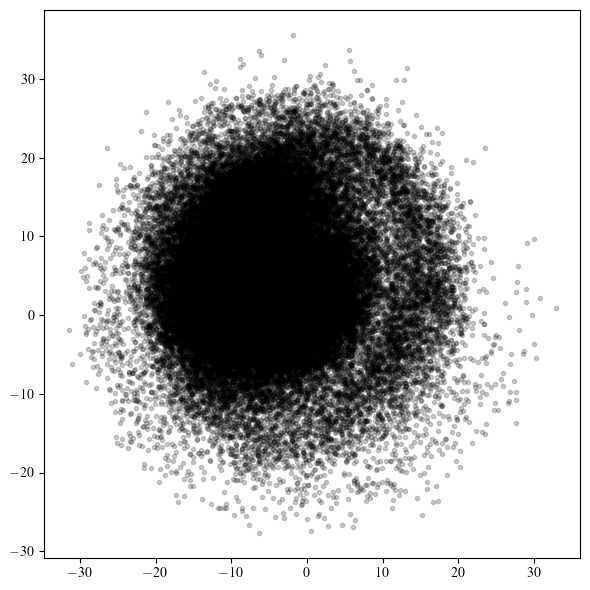

In [42]:
fig, axs = plt.subplots(1, figsize=(6, 6), sharey=True)
axs.scatter(x_warp, y_warp, label= '', marker='.', alpha=0.2,color='black')

plt.tight_layout()

In [8]:
N_disk = np.array(f_disk['ParticleIDs'])
print(N_disk)
len(N_disk)

[1131204 1127627 1128047 ... 1057860 1057570 1116719]


200000

In [9]:
#print(list(f_disk.keys()))

disk_x = np.array(f['PartType2']['Coordinates'][:,0])
disk_y = np.array(f['PartType2']['Coordinates'][:,1])

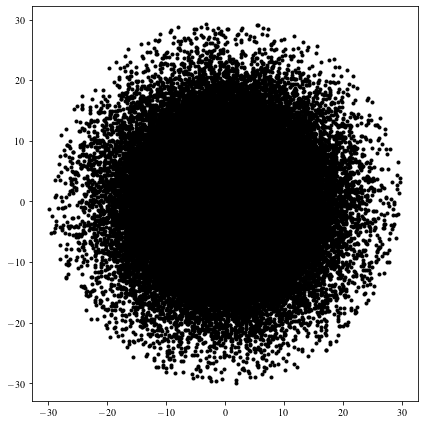

In [10]:
fig, axs = plt.subplots(1, figsize=(6, 6), sharey=True)
axs.scatter(disk_x, disk_y, label= '', marker=".", color='black')

plt.tight_layout()
#name = 'teste.png'
#plt.savefig(name)